In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import glob
import numpy as np 

In [2]:
geo_df = gpd.read_file("https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson")
geo_df.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908..."
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774..."
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028..."
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ..."
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ..."


In [3]:
#plt.grid()
#geo_df.plot()

In [4]:
data_path = os.getcwd()+ '/Data/Temp/2022/'
db_data_path = data_path 
os.listdir()
print(os.listdir(db_data_path))

['202201010000TMed.csv', '202202010000TMed.csv', '202203010000TMed.csv', '202204010000TMed.csv', '202205010000TMed.csv', '202206010000TMed.csv', '202207010000TMed.csv', '202208010000TMed.csv', '202209010000TMed.csv', '202210010000TMed.csv', '202211010000TMed.csv', '202212010000TMed.csv']


In [5]:
path = os.getcwd()+ '/Data/Temp/2022/'
all_files = glob.glob(path+'*.csv')
all_files

['C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2022\\202201010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2022\\202202010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2022\\202203010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2022\\202204010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2022\\202205010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2022\\202206010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2022\\202207010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2022\\202208010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2022\\202209010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2022\\202210010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2022\\202211010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Es

In [6]:
#dfPrueba=[df1,df2]
li = []
TMed = ['TMed202201','TMed202202','TMed202203','TMed202204','TMed202205','TMed202206','TMed202207','TMed202208','TMed202209',
        'TMed202210','TMed202211','TMed202212' ]

In [7]:
for i in range(len(TMed)):
    df = pd.read_csv(all_files[i], encoding='latin-1')
    df = df.rename(columns={'Tmed':TMed[i]})
    li.append(df)
    
li[0].head()

,Lon,Lat,Clave,Edo,Est,TMed202201
0,-102.18,21.74,BRTAG,AGS,San Bartolo Ags.,12.6
1,-102.13,21.81,TNJAG,AGS,La Tinaja 2 Ags.,14.1
2,-102.19,21.83,CLVAG,AGS,Calvillo Ags.,11.4
3,-102.11,21.88,SNVAG,AGS,Sandovales Ags.,11.8
4,-101.97,21.92,PALAG,AGS,Palo Alto Ags.,12.8


In [8]:
d1=li[0]
d2=li[1]
d3=li[2]
d4=li[3]
d5=li[4]
d6=li[5]
d7=li[6]
d8=li[7]
d9=li[8]
d10=li[9]
d11=li[10]
d12=li[11]
#len(d1),len(d2)

In [11]:
df_outer = pd.merge(d1,d2,
              on=['Clave','Lon','Lat','Est','Edo'], how='outer')

df_outer = pd.merge(df_outer , d3, on=['Clave','Lon','Lat','Est','Edo'], how='outer')

#pd.concat(li,axis=0,ignore_index=True)
df_outer.head()

,Lon,Lat,Clave,Edo,Est,TMed202201,TMed202202,TMed202203
0,-102.18,21.74,BRTAG,AGS,San Bartolo Ags.,12.6,12.8,15.3
1,-102.13,21.81,TNJAG,AGS,La Tinaja 2 Ags.,14.1,14.7,17.8
2,-102.19,21.83,CLVAG,AGS,Calvillo Ags.,11.4,12.0,14.1
3,-102.11,21.88,SNVAG,AGS,Sandovales Ags.,11.8,12.5,15.2
4,-101.97,21.92,PALAG,AGS,Palo Alto Ags.,12.8,13.4,16.5


In [12]:
from functools import reduce
dfl=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Clave','Lon','Lat','Est','Edo'],
                                            how='outer'), dfl)

df_merged

,Lon,Lat,Clave,Edo,Est,TMed202201,TMed202202,TMed202203,TMed202204,TMed202205,TMed202206,TMed202207,TMed202208,TMed202209,TMed202210,TMed202211,TMed202212
0,-102.18,21.74,BRTAG,AGS,San Bartolo Ags.,12.6,12.8,15.3,18.8,NaN,NaN,NaN,NaN,17.6,16.2,14.0,12.8
1,-102.13,21.81,TNJAG,AGS,La Tinaja 2 Ags.,14.1,14.7,17.8,21.0,NaN,NaN,NaN,NaN,18.9,17.9,17.2,14.4
2,-102.19,21.83,CLVAG,AGS,Calvillo Ags.,11.4,12.0,14.1,17.3,NaN,NaN,NaN,NaN,16.7,15.8,13.3,11.1
3,-102.11,21.88,SNVAG,AGS,Sandovales Ags.,11.8,12.5,15.2,15.9,NaN,NaN,NaN,NaN,13.8,13.0,13.4,12.3
4,-101.97,21.92,PALAG,AGS,Palo Alto Ags.,12.8,13.4,16.5,19.8,NaN,NaN,NaN,NaN,18.7,NaN,15.6,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,-100.66,18.35,CA2GR,GRO,Ciudad Altamirano Gro. SMN*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.1
2188,-100.37,20.56,QUERETARO_OB,QRO,Observatorio de Querétaro Qro. SMN*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.2
2189,-107.84,25.49,SANJUAN,SIN,San Juan Sin. SMN*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.7
2190,-91.23,17.29,CUSUMACINTA,TAB,Cañón Usumacinta Tab. SMN*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.8


In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 0 to 2191
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lon         2192 non-null   float64
 1   Lat         2192 non-null   float64
 2   Clave       2191 non-null   object 
 3   Edo         2191 non-null   object 
 4   Est         2191 non-null   object 
 5   TMed202201  1414 non-null   float64
 6   TMed202202  1427 non-null   float64
 7   TMed202203  1426 non-null   float64
 8   TMed202204  1372 non-null   float64
 9   TMed202205  1398 non-null   float64
 10  TMed202206  1412 non-null   float64
 11  TMed202207  1373 non-null   float64
 12  TMed202208  1388 non-null   float64
 13  TMed202209  1429 non-null   float64
 14  TMed202210  1421 non-null   float64
 15  TMed202211  1389 non-null   float64
 16  TMed202212  1301 non-null   float64
dtypes: float64(14), object(3)
memory usage: 308.2+ KB


In [14]:
cols = ['TMed202201','TMed202202','TMed202203','TMed202204','TMed202205','TMed202206','TMed202207','TMed202208','TMed202209',
        'TMed202210','TMed202211','TMed202212']
df_merged['TMed'] = df_merged[cols].mean(axis=1)
df_merged

,Lon,Lat,Clave,Edo,Est,TMed202201,TMed202202,TMed202203,TMed202204,TMed202205,TMed202206,TMed202207,TMed202208,TMed202209,TMed202210,TMed202211,TMed202212,TMed
0,-102.18,21.74,BRTAG,AGS,San Bartolo Ags.,12.6,12.8,15.3,18.8,NaN,NaN,NaN,NaN,17.6,16.2,14.0,12.8,15.0125
1,-102.13,21.81,TNJAG,AGS,La Tinaja 2 Ags.,14.1,14.7,17.8,21.0,NaN,NaN,NaN,NaN,18.9,17.9,17.2,14.4,17.0000
2,-102.19,21.83,CLVAG,AGS,Calvillo Ags.,11.4,12.0,14.1,17.3,NaN,NaN,NaN,NaN,16.7,15.8,13.3,11.1,13.9625
3,-102.11,21.88,SNVAG,AGS,Sandovales Ags.,11.8,12.5,15.2,15.9,NaN,NaN,NaN,NaN,13.8,13.0,13.4,12.3,13.4875
4,-101.97,21.92,PALAG,AGS,Palo Alto Ags.,12.8,13.4,16.5,19.8,NaN,NaN,NaN,NaN,18.7,NaN,15.6,13.1,15.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,-100.66,18.35,CA2GR,GRO,Ciudad Altamirano Gro. SMN*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.1,27.1000
2188,-100.37,20.56,QUERETARO_OB,QRO,Observatorio de Querétaro Qro. SMN*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.2,13.2000
2189,-107.84,25.49,SANJUAN,SIN,San Juan Sin. SMN*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.7,20.7000
2190,-91.23,17.29,CUSUMACINTA,TAB,Cañón Usumacinta Tab. SMN*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.8,24.8000


In [15]:
geo_df1 = gpd.GeoDataFrame(df_merged, geometry=gpd.points_from_xy(df_merged.Lon, df_merged.Lat), crs="EPSG:4326")
geo_df1

,Lon,Lat,Clave,Edo,Est,TMed202201,TMed202202,TMed202203,TMed202204,TMed202205,TMed202206,TMed202207,TMed202208,TMed202209,TMed202210,TMed202211,TMed202212,TMed,geometry
0,-102.18,21.74,BRTAG,AGS,San Bartolo Ags.,12.6,12.8,15.3,18.8,NaN,NaN,NaN,NaN,17.6,16.2,14.0,12.8,15.0125,POINT (-102.18000 21.74000)
1,-102.13,21.81,TNJAG,AGS,La Tinaja 2 Ags.,14.1,14.7,17.8,21.0,NaN,NaN,NaN,NaN,18.9,17.9,17.2,14.4,17.0000,POINT (-102.13000 21.81000)
2,-102.19,21.83,CLVAG,AGS,Calvillo Ags.,11.4,12.0,14.1,17.3,NaN,NaN,NaN,NaN,16.7,15.8,13.3,11.1,13.9625,POINT (-102.19000 21.83000)
3,-102.11,21.88,SNVAG,AGS,Sandovales Ags.,11.8,12.5,15.2,15.9,NaN,NaN,NaN,NaN,13.8,13.0,13.4,12.3,13.4875,POINT (-102.11000 21.88000)
4,-101.97,21.92,PALAG,AGS,Palo Alto Ags.,12.8,13.4,16.5,19.8,NaN,NaN,NaN,NaN,18.7,NaN,15.6,13.1,15.7000,POINT (-101.97000 21.92000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,-100.66,18.35,CA2GR,GRO,Ciudad Altamirano Gro. SMN*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.1,27.1000,POINT (-100.66000 18.35000)
2188,-100.37,20.56,QUERETARO_OB,QRO,Observatorio de Querétaro Qro. SMN*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.2,13.2000,POINT (-100.37000 20.56000)
2189,-107.84,25.49,SANJUAN,SIN,San Juan Sin. SMN*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.7,20.7000,POINT (-107.84000 25.49000)
2190,-91.23,17.29,CUSUMACINTA,TAB,Cañón Usumacinta Tab. SMN*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.8,24.8000,POINT (-91.23000 17.29000)


In [16]:
intersect = gpd.overlay(geo_df1, geo_df, how='intersection')
intersect

,Lon,Lat,Clave,Edo,Est,TMed202201,TMed202202,TMed202203,TMed202204,TMed202205,...,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,-102.18,21.74,BRTAG,AGS,San Bartolo Ags.,12.6,12.8,15.3,18.8,NaN,...,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,POINT (-102.18000 21.74000)
1,-102.13,21.81,TNJAG,AGS,La Tinaja 2 Ags.,14.1,14.7,17.8,21.0,NaN,...,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,POINT (-102.13000 21.81000)
2,-102.19,21.83,CLVAG,AGS,Calvillo Ags.,11.4,12.0,14.1,17.3,NaN,...,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,POINT (-102.19000 21.83000)
3,-102.11,21.88,SNVAG,AGS,Sandovales Ags.,11.8,12.5,15.2,15.9,NaN,...,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,POINT (-102.11000 21.88000)
4,-101.97,21.92,PALAG,AGS,Palo Alto Ags.,12.8,13.4,16.5,19.8,NaN,...,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,POINT (-101.97000 21.92000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,-103.46,21.47,TGOZC,ZAC,Tel de Gonzlez Ortega Zac.,NaN,NaN,NaN,NaN,NaN,...,32,Zacatecas,Zacatecas,31.3,24.32,22.88,52.01,48.17,0.79,POINT (-103.46000 21.47000)
2154,-103.09,21.93,GJAZC,ZAC,General Joaqun Amaro Zac.,NaN,NaN,NaN,NaN,NaN,...,32,Zacatecas,Zacatecas,31.3,24.32,22.88,52.01,48.17,0.79,POINT (-103.09000 21.93000)
2155,-102.90,21.72,PMOZC,ZAC,Los Moraleos Zac.,NaN,NaN,NaN,NaN,NaN,...,32,Zacatecas,Zacatecas,31.3,24.32,22.88,52.01,48.17,0.79,POINT (-102.90000 21.72000)
2156,-101.39,24.62,CORZC,ZAC,Concepcin del Oro Zac.,NaN,NaN,NaN,NaN,NaN,...,32,Zacatecas,Zacatecas,31.3,24.32,22.88,52.01,48.17,0.79,POINT (-101.39000 24.62000)


In [17]:
grouped = intersect.groupby(['id','state'])['TMed'].agg('mean')
grouped.head()

id  state              
1   Aguascalientes         17.266373
2   Baja California        22.490019
3   Baja California Sur    25.258918
4   Campeche               27.303720
5   Chiapas                24.252235
Name: TMed, dtype: float64

In [28]:
merge = pd.merge(geo_df, grouped, on="id")
merge = merge.rename(columns={'TMed': 'TMed22'})
merge.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,TMed22
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",17.266373
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",22.490019
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",25.258918
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...",27.303720
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...",24.252235


In [29]:
merge['TMed22'].max()

27.416756927879376

Text(0.5, 1.0, 'Temperature by state')

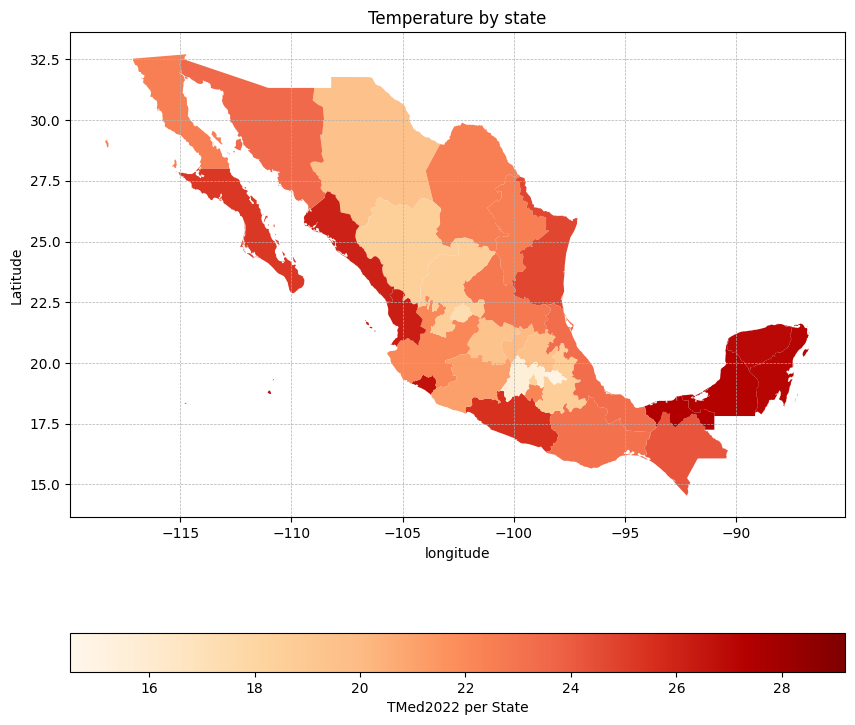

In [30]:
import matplotlib.pyplot as plt

merge.plot(column='TMed22', figsize=(10,10),
           legend_kwds={'label': "TMed2022 per State", 'orientation': "horizontal"}, legend=True, cmap='OrRd',vmin=14.5, vmax=29.2)

plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel("longitude")
plt.ylabel("Latitude")
plt.title("Temperature by state")
#plt.savefig("TMed2022")


# Analisis por mes

Agrupar la tabla merge con los meses e identificador por estado

In [31]:
grouped2 = intersect.groupby(['id','state'])[cols].agg('mean')
grouped2.head()

,,TMed202201,TMed202202,TMed202203,TMed202204,TMed202205,TMed202206,TMed202207,TMed202208,TMed202209,TMed202210,TMed202211,TMed202212
id,state,,,,,,,,,,,,
1,Aguascalientes,13.496296,14.314815,16.748000,19.753846,22.494444,21.636842,20.989474,20.300000,18.323077,17.180000,15.840741,13.756000
2,Baja California,14.003704,14.353333,16.441379,18.970370,20.961538,25.496552,27.185185,27.837037,26.413333,22.641667,15.035714,13.067857
3,Baja California Sur,19.209677,18.303226,19.983333,21.693333,23.670000,26.716129,28.920000,29.130000,27.906250,25.109375,20.980645,19.125806
4,Campeche,23.860000,24.952632,26.831579,29.268421,29.968421,28.461111,28.631579,28.731579,27.952632,27.057895,26.610526,25.021053
5,Chiapas,22.455556,22.590909,24.532857,26.398592,26.483333,24.694737,25.214286,25.256962,24.675532,24.222222,23.830769,22.148276


In [32]:
dfAñoMes2022 = pd.merge(merge, grouped2, on="id")
dfAñoMes2022

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,...,TMed202203,TMed202204,TMed202205,TMed202206,TMed202207,TMed202208,TMed202209,TMed202210,TMed202211,TMed202212
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",...,16.748000,19.753846,22.494444,21.636842,20.989474,20.300000,18.323077,17.180000,15.840741,13.756000
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",...,16.441379,18.970370,20.961538,25.496552,27.185185,27.837037,26.413333,22.641667,15.035714,13.067857
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",...,19.983333,21.693333,23.670000,26.716129,28.920000,29.130000,27.906250,25.109375,20.980645,19.125806
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...",...,26.831579,29.268421,29.968421,28.461111,28.631579,28.731579,27.952632,27.057895,26.610526,25.021053
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...",...,24.532857,26.398592,26.483333,24.694737,25.214286,25.256962,24.675532,24.222222,23.830769,22.148276
5,6,Chihuahua,Chihuahua,15.2,10.22,34.16,53.92,85.10,1.70,"MULTIPOLYGON (((-108.13750 31.77754, -108.1116...",...,15.201818,20.816667,24.505556,26.550000,26.112727,24.426415,22.365385,18.383333,13.555556,12.391837
6,7,Coahuila,Coahuila de Zaragoza,5.7,6.24,35.01,57.73,106.05,1.02,"MULTIPOLYGON (((-102.27618 29.86955, -102.2582...",...,19.185714,24.605714,28.202778,29.597059,30.155556,28.506061,25.064706,21.196970,16.993939,14.893548
7,8,Colima,Colima,21.0,13.36,18.30,67.89,76.49,0.45,"MULTIPOLYGON (((-114.73404 18.32925, -114.7405...",...,24.194737,25.510526,26.640000,27.973684,28.468421,28.315789,27.668421,27.631579,26.973684,25.789474
8,9,Distrito Federal,Distrito Federal,4.8,0.68,16.48,80.72,172.88,2.12,"MULTIPOLYGON (((-98.96395 19.08912, -98.97687 ...",...,18.477778,20.315385,21.629167,19.161538,19.629167,18.956000,18.223077,18.258333,17.414286,15.160870
9,10,Durango,Durango,17.4,16.62,25.77,56.25,67.61,1.36,"MULTIPOLYGON (((-105.75610 26.69129, -105.7295...",...,16.339706,20.829310,23.315625,24.095161,23.923333,22.509259,20.329630,17.773214,14.913793,14.178000


In [33]:
dfAñoMes2022.to_csv('TempMexAñoMes2022.csv',index=False)